# Gradient Descent

As we have summarized - we want to find values of w and b which minimizes the cost function. What we would do in this exercise is:
* Write a function which calculate cost given w and b.
* Write a function which can give us delta for w and b (for given w and b) - called gradient.
* Use the above function to write gradient_decent which will converge w and b to global minima. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

In [3]:
#functoin to predict y from x given parameters w and b
def hypothesis(x, w, b):
    return w * x + b

In [4]:
print(hypothesis(1.0, 200, 100))

300.0


In [5]:
#calculate cost from current training set.
#x and y both are vetors here.
def calculate_cost(w, b, x, y):
    cost = 0
    m = x.size
    for i in range(m):
        y_hat = hypothesis(x[i], w, b)
        cost = cost + (y_hat - y[i])**2
    return cost/2*m    
    
    

In [6]:
print(calculate_cost(200, 150, x_train, y_train))

5000.0


In [7]:
def calculate_gradient(w, b, x, y):
    w_grad = 0.0
    b_grad = 0.0
    m = x.size
    for i in range(m):
        f_w_b = hypothesis(x[i], w, b)
        w_grad = w_grad + (f_w_b - y[i]) * x[i]
        b_grad = b_grad + (f_w_b - y[i])
    return (w_grad/m, b_grad/m)    

In [8]:
print(calculate_gradient(50,10, x_train, y_train))
print(calculate_gradient(500,300, x_train, y_train))


(-510.0, -315.0)
(1050.0, 650.0)


In [9]:
def gradient_decent(w, b, alpha, num_iter, x_train, y_train):
    cost_history = []
    for i in range(num_iter):
        (w_delta, b_delta) = calculate_gradient(w,b,x_train,y_train)
        w = w - alpha * w_delta
        b = b - alpha * b_delta
        cost_history.append(calculate_cost(w, b, x_train, y_train))                  
    
    return (w,b, cost_history)
    

In [10]:
(w,b, J_hist) = gradient_decent(0.0, 0.0, 1.0e-2, 10000, x_train, y_train)
print(w,b)

199.99285075131766 100.011567727362


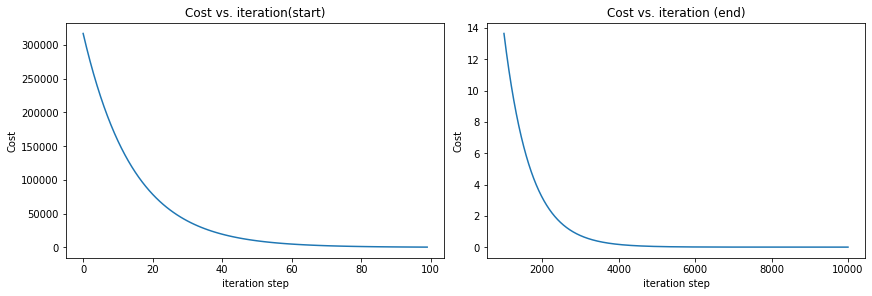

In [11]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()